In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('/content/01_Cost of Living.xlsx')

In [ ]:
# Preview data
print("Preview of the dataset:")
print(df.head())

Preview of the dataset:
        Country  Year  Average_Monthly_Income  Cost_of_Living         Region
0     Australia  2013                 3483.92         1106.07        Oceania
1         India  2019                 7771.03         5422.78           Asia
2        Russia  2004                 6991.30         3972.36         Europe
3  South Africa  2011                 6628.04         6755.75         Africa
4        Brazil  2015                 2434.27         2656.36  South America


In [ ]:
df.shape

(201, 5)

In [ ]:
# Check data info
print("\nData information:")
print(df.info())


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 201 non-null    object 
 1   Year                    201 non-null    int64  
 2   Average_Monthly_Income  199 non-null    float64
 3   Cost_of_Living          201 non-null    float64
 4   Region                  199 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 8.0+ KB
None


Cleaning data

In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Country                   0
Year                      0
Average_Monthly_Income    2
Cost_of_Living            0
Region                    2
dtype: int64


In [ ]:
# Fillna the missing values
df["Average_Monthly_Income"] = df["Average_Monthly_Income"].fillna(df["Average_Monthly_Income"].median())

mode_value = df["Region"].mode()[0]
df["Region"] = df["Region"].fillna(mode_value)

df.isnull().sum()

,0
Country,0
Year,0
Average_Monthly_Income,0
Cost_of_Living,0
Region,0


In [ ]:
# Check the duplicated values
df.duplicated().sum()

np.int64(2)

In [ ]:
# Romoving the duplicated values
df.drop_duplicates()

,Country,Year,Average_Monthly_Income,Cost_of_Living,Region
0,Australia,2013,3483.92,1106.07,Oceania
1,India,2019,7771.03,5422.78,Asia
2,Russia,2004,6991.30,3972.36,Europe
3,South Africa,2011,6628.04,6755.75,Africa
4,Brazil,2015,2434.27,2656.36,South America
...,...,...,...,...,...
196,Russia,2012,2530.59,1594.45,Europe
197,France,2014,5330.00,6038.94,Europe
198,Brazil,2020,3565.51,3649.03,South America
199,United States,2015,690.40,2031.73,North America


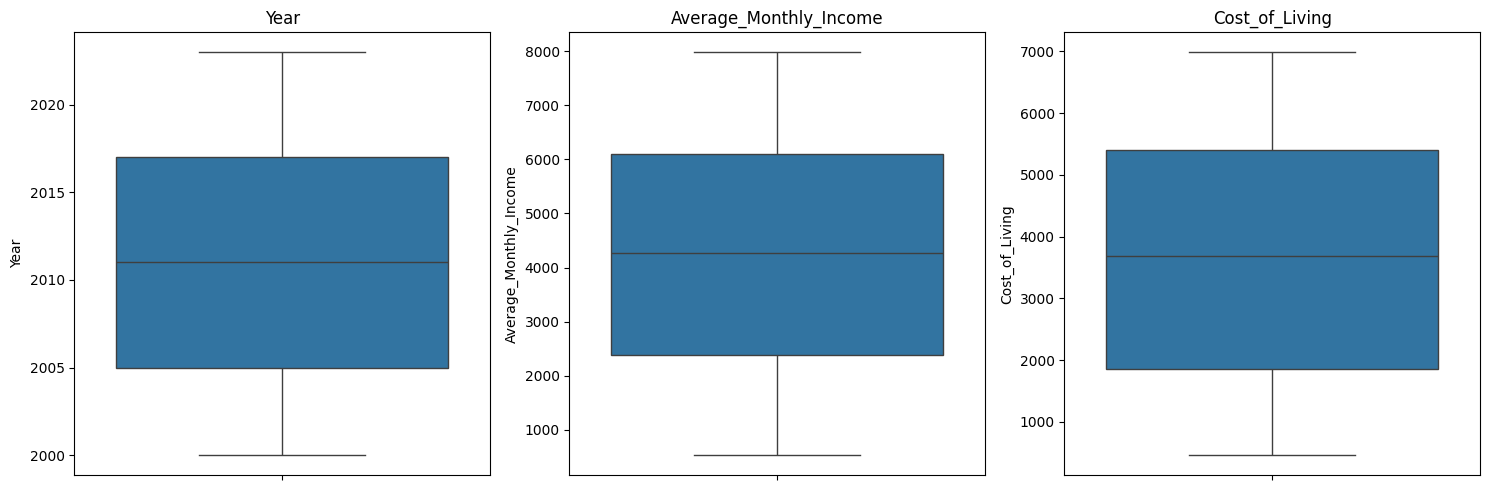

In [ ]:
# Check outliers for numeric columns
plt.figure(figsize=(15, 5))
numeric_cols = ["Year", "Average_Monthly_Income", "Cost_of_Living"]

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

EDA

In [ ]:
# Basic descriptive statistics
print("\nDescriptive statistics:")
df.describe()


Descriptive statistics:


,Year,Average_Monthly_Income,Cost_of_Living
count,201.000000,201.000000,201.000000
mean,2011.303483,4274.908856,3700.242438
std,6.836844,2129.090618,1985.907450
min,2000.000000,534.740000,464.490000
25%,2005.000000,2388.490000,1857.080000
50%,2011.000000,4270.400000,3688.090000
75%,2017.000000,6107.070000,5404.540000
max,2023.000000,7976.560000,6981.020000


In [ ]:
# Count unique values for each categorical column
print("\nUnique values per categorical column:")
cat_cols = ["Country", "Region"]
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values per categorical column:
Country: 12 unique values
Region: 6 unique values


Visualizations & Insights

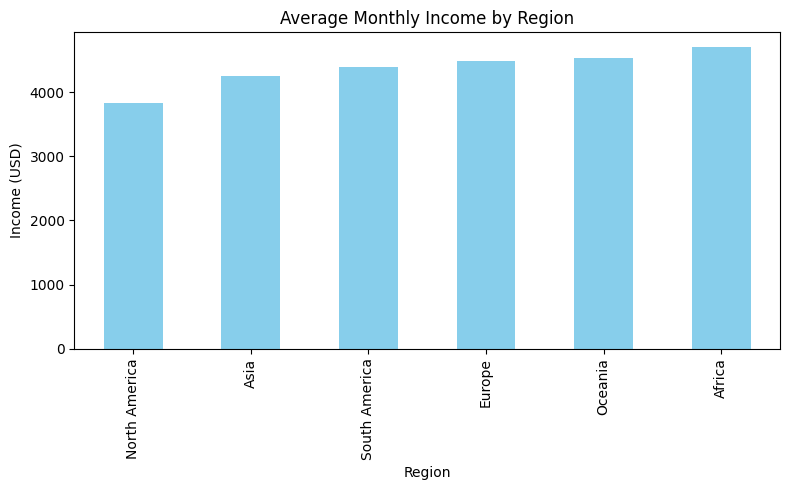

In [ ]:
# 1. Bar chart: Average monthly income by region
region_income = df.groupby('Region')['Average_Monthly_Income'].mean().sort_values()
plt.figure(figsize=(8,5))
region_income.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Income by Region')
plt.ylabel('Income (USD)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

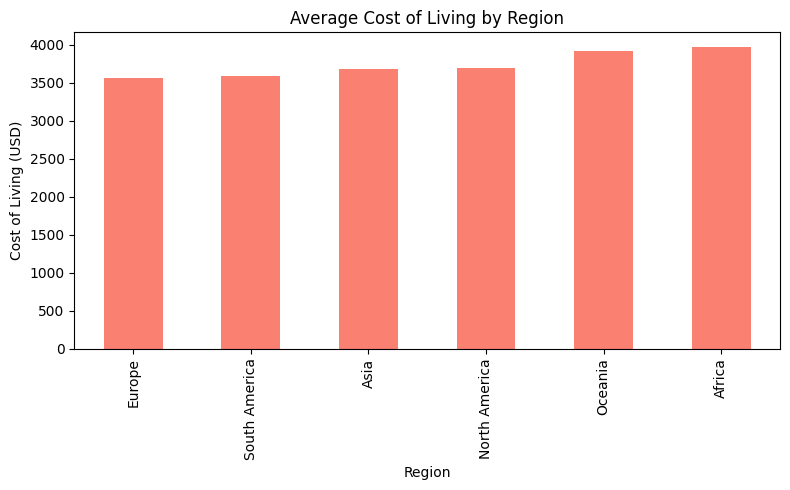

In [ ]:
# 2. Bar chart: Average cost of living by region
region_cost = df.groupby('Region')['Cost_of_Living'].mean().sort_values()
plt.figure(figsize=(8,5))
region_cost.plot(kind='bar', color='salmon')
plt.title('Average Cost of Living by Region')
plt.ylabel('Cost of Living (USD)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

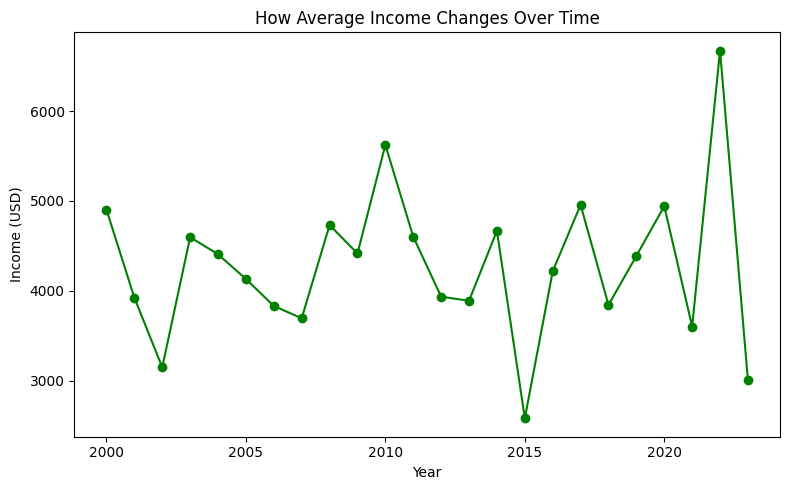

In [ ]:
# 3. Line plot: Average income changes across years
year_income = df.groupby('Year')['Average_Monthly_Income'].mean()
plt.figure(figsize=(8,5))
year_income.plot(kind='line', marker='o', color='green')
plt.title('How Average Income Changes Over Time')
plt.xlabel('Year')
plt.ylabel('Income (USD)')
plt.tight_layout()
plt.show()

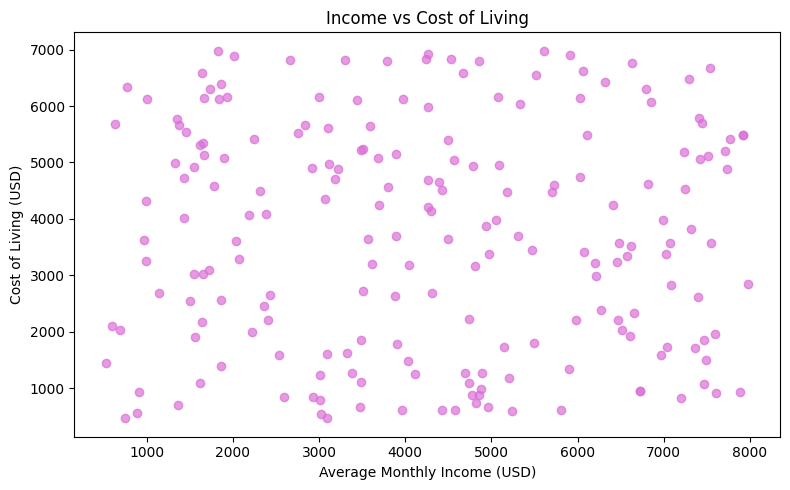

In [ ]:
# 4. Simple scatter plot: Income vs Cost of Living
plt.figure(figsize=(8,5))
plt.scatter(df['Average_Monthly_Income'], df['Cost_of_Living'], alpha=0.7, color='orchid')
plt.title('Income vs Cost of Living')
plt.xlabel('Average Monthly Income (USD)')
plt.ylabel('Cost of Living (USD)')
plt.tight_layout()
plt.show()

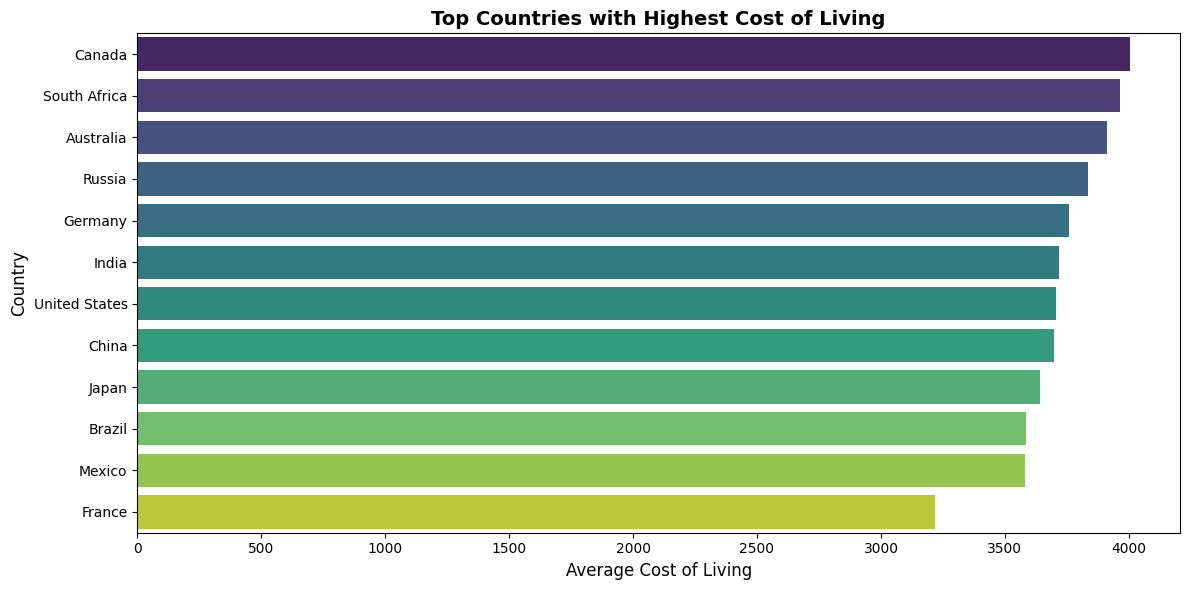

In [ ]:
# 5. Bar chart: Top countries with highest average income
if "Country" in df.columns and "Cost_of_Living" in df.columns:
    plt.figure(figsize=(12, 6))
    top_countries = (
        df.groupby("Country")["Cost_of_Living"]
        .mean()
        .sort_values(ascending=False)
        .head(12)
        .reset_index()
    )
    sns.barplot(
        data=top_countries,
        x="Cost_of_Living",
        y="Country",
        hue="Country",
        dodge=False,
        palette="viridis",
        legend=False
    )
    plt.title("Top Countries with Highest Cost of Living", fontsize=14, fontweight='bold')
    plt.xlabel("Average Cost of Living", fontsize=12)
    plt.ylabel("Country", fontsize=12)
    plt.tight_layout()
    plt.show()